In [4]:
%matplotlib notebook
from camera import take_picture
from camera import use_camera
from database import Database
import matplotlib.pyplot as plt
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models
import skimage.io as io
import numpy as np
from matplotlib.patches import Rectangle
import warnings
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

class Face_Recognition:
    
    def __init__(self, upscale=1):
        self.upscale = upscale # number of times to upscale image before detecting
    
    def take_picture(self):
        return take_picture()

    def find_faces(self, pic, database):
        """
        Returns
        -------
        nothing
        """
        fig,ax = plt.subplots()
        ax.imshow(pic)
        desc_list = []
        name_list = []
        detections = list(face_detect(pic, self.upscale))
        for i in range(len(detections)):
            l, r, t, b = detections[i].left(), detections[i].right(), detections[i].top(), detections[i].bottom() 
            shape = shape_predictor(pic, detections[i])
            desc = np.array(face_rec_model.compute_face_descriptor(pic, shape))
            name = self.compare_faces(database, desc)
            desc_list.append(desc)
            name_list.append(name)
            ax.add_patch(Rectangle((l, b), r-l, t-b, Fill=None, alpha=1, color='yellow'))
            ax.text(l,b,name, color='white')
        return desc_list, name_list
    
    def compare_faces(self, database, desc):
        """keys are names
        iterate over database
        find best match and assign a name
        np.sqrt(np.sum((desc1 - desc2)**2))
        """
        # descript = a (128,) shape descriptor
        least = 1
        least_key = ""
        for key in database.items():
            v = np.sqrt(np.sum((desc-database.items()[key])**2))
            if least > v:
                least = v
                least_key = key
        print(least)
        if least > 0.45:
            return "No match found"
        else:
            return least_key
        
    def update_faces(self, desc_list, name_list, database):
        ans = input("Are the names and faces correctly matched? Unmatched faces will be added by your input. (y or n)")
        if ans == "y":
            for i in range(len(desc_list)):
                if name_list[i] == "No match found":
                    name = input("Please enter a name for this person.")
                    found = False
                    for x in database.items():
                        if name == x:
                            database.update_user_image(name, desc_list[i])
                            found = True
                    if found == False:
                        database.update(name, desc_list[i])
                else:
                    database.update_user_image(name_list[i], desc_list[i])
            print("database updated")
        else:
            print("database not updated")
    
    def file_read(self, file_id):
        img_array = io.imread(file_id)
        if (img_array.shape[2] == 4):
            img_array = img_array[:, :, :3]
        return img_array
    
    def name_faces_from_picture(self, database):
        with use_camera() as camera:
            pic = self.take_picture()
        desc, names = self.find_faces(pic, database)
        warnings.filterwarnings("ignore",".*GUI is implemented.*")
        try:
            plt.pause(0.5)
        except Exception:
            pass
        
        self.update_faces(desc, names, database)
        
    def name_faces_from_file(self, file_id, database):
        pic = self.file_read(file_id)
        desc, names = self.find_faces(pic, database)
        warnings.filterwarnings("ignore",".*GUI is implemented.*")
        try:
            plt.pause(0.5)
        except Exception:
            pass
        self.update_faces(desc, names, database)
        
    def add_new_from_file(self, file_id, database):
        pic = self.file_read(file_id)
        desc, names = self.find_faces(pic, database)
        desc = desc[0]
        warnings.filterwarnings("ignore",".*GUI is implemented.*")
        try:
            plt.pause(0.5)
        except Exception:
            pass
        name = input("Please enter a name for this person.")
        database.update(name, desc)
    
    def add_new_from_picture(self, database):
        pic = self.take_picture()
        desc = self.find_faces(pic, database)
        desc = desc[0]
        warnings.filterwarnings("ignore",".*GUI is implemented.*")
        try:
            plt.pause(0.5)
        except Exception:
            pass
        name = input("Please enter a name for this person.")
        database.update(name, desc)

File already exists:
	c:\users\student\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\student\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat


In [5]:
f = Face_Recognition()
d = Database("goodfile.npy")

<IPython.core.display.Javascript object>


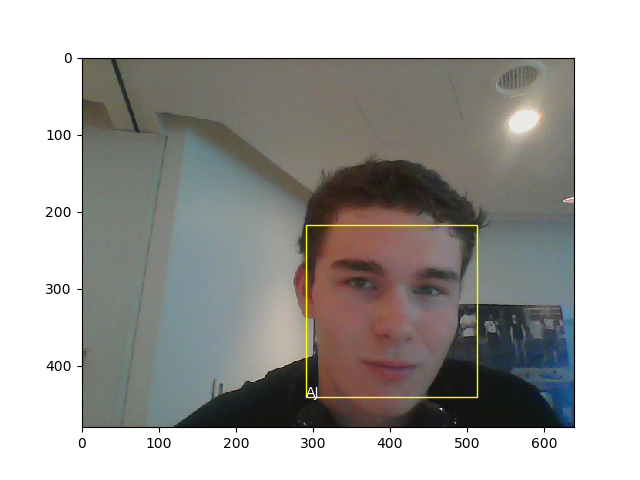

0.286246578686
Are the names and faces correctly matched? Unmatched faces will be added by your input. (y or n)y
database updated


In [6]:
f.name_faces_from_picture(d)
#f.add_new_from_file("/Users/megankaye/Desktop/noah.png", d)
#f.name_faces_from_file("/Users/megankaye/Desktop/johnny2.png", d)
#fig.savefig("test.png")
#f.add_new_from_picture(d)

In [7]:
d.save_obj("goodfile.npy")

'successfully saved'